In [1]:
import numpy as np
import pandas as pd    

In [2]:
import matplotlib.pyplot as plt

In [3]:
#Dying relu-> learning rate büyük olduğunda, epoch sayısı fazla olduğunda
# ama epoch azken de eğitmeyebiliyor

In [4]:
def relu(x):
    return np.maximum(0,x)

In [5]:
def deriv_relu(x):
    der=list()
    der.clear()
    for val in x:
        if val>0:
            der.append(1)
        else:
            der.append(0)
    return der

In [6]:
def initialize(x, neuron_num1, neuron_num2):
    np.random.seed(12345)
    w1=2*np.random.random((len(x.columns), neuron_num1))-1
    w2=2*np.random.random((neuron_num1, neuron_num2))-1
    w3=2*np.random.random((neuron_num2, 1))-1
    bias1=2*np.random.random()-1
    bias2=2*np.random.random()-1
    bias3=2*np.random.random()-1
    return w1, w2, w3, bias1, bias2, bias3

In [7]:
def forward_prop(w1, w2, w3, bias1, bias2, bias3, x): 
    x=x.reshape(13,1)
    z1=np.dot(w1.T,x)+bias1
    out1=relu(z1)
    z2=np.dot(w2.T,out1)+bias2
    out2=relu(z2) 
    z3=np.dot(w3.T,out2)+bias3
    out3=relu(z3)
    return z1, out1, z2, out2, z3, out3 

In [8]:
def back_prop(w1, w2, w3, bias1, bias2, bias3, x, y, z1, out1, z2, out2, z3, out3, lr):
    x=x.reshape(13,1)
    
    err_3=2*(np.subtract(out3.sum(axis=0), y))
    dummy_3=np.array(deriv_relu(z3)).reshape(len(z3),1)
    dc_dw3=lr*np.dot(out2,dummy_3)*err_3
    w3=np.subtract(w3,dc_dw3)
    dc_db3=lr*err_3
    bias3-=dc_db3
    
    
    err_2=2*(np.subtract(out2.sum(axis=0), y)) # karenin turevi oldugu icin 2*(y_pred-y_act)
    dummy_2=np.array(deriv_relu(z2)).reshape(len(z2),1)
    dc_dw2=lr*np.dot(out1,dummy_2.T)*err_2
    w2=np.subtract(w2,dc_dw2)
    dc_db2=lr*err_2
    bias2-=dc_db2

    err_1= 2*(np.subtract(out1.sum(axis=0), y))
    dummy_1=np.array(deriv_relu(z1)).reshape(len(z1),1)
    dc_dw1=lr*np.dot(x,dummy_1.T)*err_1
    w1=np.subtract(w1,dc_dw1)
    dc_db1=lr*err_1
    bias1-=dc_db1
    return w1, w2, w3, bias1, bias2, bias3

In [9]:
pd.set_option("display.max_rows", None,
             "display.max_columns", None)

In [10]:
PATH="/Users/ecemdenizbabaoglan/Desktop/TOBBETU/yap470/housing.csv" #Buraya housing.csv dosyasının bilgisayardaki yolu girilmelidir

In [11]:
columns=("CRIM","ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV")

In [12]:
ds=pd.read_csv(PATH, sep='\s+', engine='python', names=columns)

In [13]:
target=ds.loc[:,'MEDV'].copy()
data=ds.drop('MEDV', axis=1).copy()

In [14]:
neuron_num1=12
neuron_num2=12

In [15]:
w1, w2, w3, bias1, bias2, bias3 = initialize(data, neuron_num1, neuron_num2)

In [16]:
data_normalized = ((data - data.mean()) / data.std(ddof=0)).to_numpy()
target=target.to_numpy()

In [17]:
cutoff = int(len(data) * 0.8)
x_train, x_test = data_normalized[:cutoff], data_normalized[cutoff:]
y_train, y_test = target[:cutoff], target[cutoff:]

In [18]:
epochs=400
lr=0.00001

In [19]:
train_loss_epoch=list()
test_loss_epoch=list()
out_test=list()

In [20]:
for e in range(epochs):
    loss_train=0
    loss_test=0
    for i in range(len(y_train)):   
        z1, out1, z2, out2, z3, out3= forward_prop(w1, w2, w3, bias1, bias2, bias3, x_train[i])
        w1, w2, w3, bias1, bias2, bias3 = back_prop(w1, w2, w3, bias1, bias2, bias3, x_train[i], y_train[i], z1,
                                                    out1, z2, out2, z3, out3, lr)
        loss_train+=np.square(y_train[i]-(out3.sum(axis=0)))
        
    train_loss_epoch.append(loss_train/(len(y_train)))
         
    for i in range(len(y_test)):
        z_test1, out_test1, z_test2, out_test2, z_test3, out_test3=forward_prop(w1, w2, w3, bias1, bias2, bias3, x_test[i])
        out_test.append(out_test3)
        loss_test+=np.square(y_test[i]-(out_test3.sum(axis=0)))

    test_loss_epoch.append(loss_test/(len(y_test)))

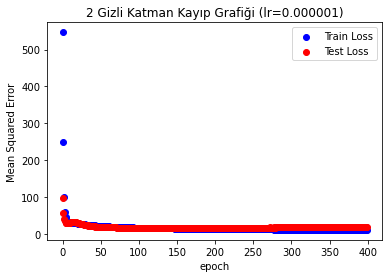

In [21]:
plt.scatter(range(epochs),train_loss_epoch, color='blue',label='Train Loss')
plt.scatter(range(epochs),test_loss_epoch, color='red', label='Test Loss')
plt.xlabel("epoch")
plt.ylabel("Mean Squared Error")
plt.title("2 Gizli Katman Kayıp Grafiği (lr=0.000001)")
plt.legend(loc="upper right")
#plt.savefig("2-hl-lr000001.jpg")
plt.show()

In [22]:
train=sum(train_loss_epoch)/len(train_loss_epoch)
print(train)

[17.21537575]


In [23]:
test=sum(test_loss_epoch)/len(test_loss_epoch)
print(test)

[18.32953712]


In [24]:
for i in range(len(y_test)):
    print(y_test[i], out_test[i])

8.5 [[16.62534719]]
5.0 [[26.90326289]]
11.9 [[6.08662884]]
27.9 [[9.45664141]]
17.2 [[9.688752]]
27.5 [[15.33042702]]
15.0 [[17.40175283]]
17.2 [[13.16782377]]
17.9 [[5.41192633]]
16.3 [[9.05956002]]
7.0 [[10.74482824]]
7.2 [[12.50771525]]
7.5 [[12.50233226]]
10.4 [[8.58238982]]
8.8 [[27.09141857]]
8.4 [[12.19964148]]
16.7 [[12.22924321]]
14.2 [[9.65403204]]
20.8 [[9.20629998]]
13.4 [[8.11411568]]
11.7 [[4.9321547]]
8.3 [[9.03082582]]
10.2 [[6.22872261]]
10.9 [[15.12987468]]
11.0 [[9.02250417]]
9.5 [[10.93015855]]
14.5 [[10.27709557]]
14.1 [[13.25696418]]
16.1 [[9.69351433]]
14.3 [[10.36521258]]
11.7 [[11.25169421]]
13.4 [[12.74977321]]
9.6 [[11.92683598]]
8.7 [[10.50962624]]
8.4 [[8.92925178]]
12.8 [[10.09982838]]
10.5 [[13.01967568]]
17.1 [[11.90340402]]
18.4 [[10.58046704]]
15.4 [[12.31043612]]
10.8 [[10.53036676]]
11.8 [[11.40687326]]
14.9 [[10.98885409]]
12.6 [[10.9774483]]
14.1 [[11.17630314]]
13.0 [[12.11146379]]
13.4 [[11.90767628]]
15.2 [[12.15121419]]
16.1 [[10.23800733]]
17